***Import packages***

In [0]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.utils.vis_utils import plot_model

from keras.layers import Dropout
from keras import backend as K
from keras.models import load_model
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization

# fix dimension ordering issue

**Load the data**

In [0]:
# load minit data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

#printng shape of mnist train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


From the above section output, it is clear that, the shape of X_train is (60000, 28, 28). Each image has 28 x 28 resolution. The shape of X_test is (10000, 28, 28).

**Show Images**

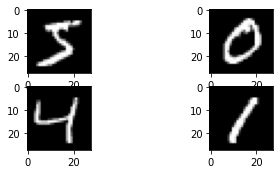

In [0]:
# plot four images as gray scale
plt.subplot(321)
plt.imshow(X_train[0],cmap='gray')
plt.subplot(322)
plt.imshow(X_train[1],cmap='gray')
plt.subplot(323)
plt.imshow(X_train[2],cmap='gray')
plt.subplot(324)
plt.imshow(X_train[3],cmap='gray')

In [0]:
y_train[0]

5

**Preprocessing the image data**

In [0]:
'''
CNN accepts a specific format when using tensorflow e.g.(batch, height, width, channels)
As all the images are in grayscale, the number of channels is 1
'''
# reshape the data to four dimensions, due to the input of model
# reshape to be [samples/batch][width][height][pixels/channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

'''
rescaled the image data below so that each pixel lies in the interval [0, 1] instead of [0, 255].
'''
# Normalization
X_train /= 255.0
X_test /= 255.0

In [0]:
'''
encode the labels i.e. Y_train and Y_test. 
In one-hot encoding an integer is converted to an array which contains only 
one ‘1’ and the rest elements are ‘0’.
'''
# one-hot
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
#print(X_train[0])
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


**Basic CNN model**

In [0]:
'''
Three steps to create a CNN
(i)   Convolution
(ii)  Activation
(iii) Pooling 
(these 3 steps can be repeated to add more hidden layers)
(iv) Fully connected network (fully connected network gives ability to the CNN 
to classify the samples)
'''
num_classes = y_test.shape[1]

model = Sequential()

# filters 32, size of filters (3,3)
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1)) #BatchNormalization normalizes the matrix after it is been through a convolution layer so that the scale of each dimension remains the same
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # act as an input to the Dense layers.

'''
Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent 
representations of the same data by randomly disabling neurons in the learning phase. 
In these model, dropout will randomnly disable 20% of the neurons.
'''

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax')) # Softmax activation enables us to calculate the output based on the probabilities

**Compile and train the model**

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

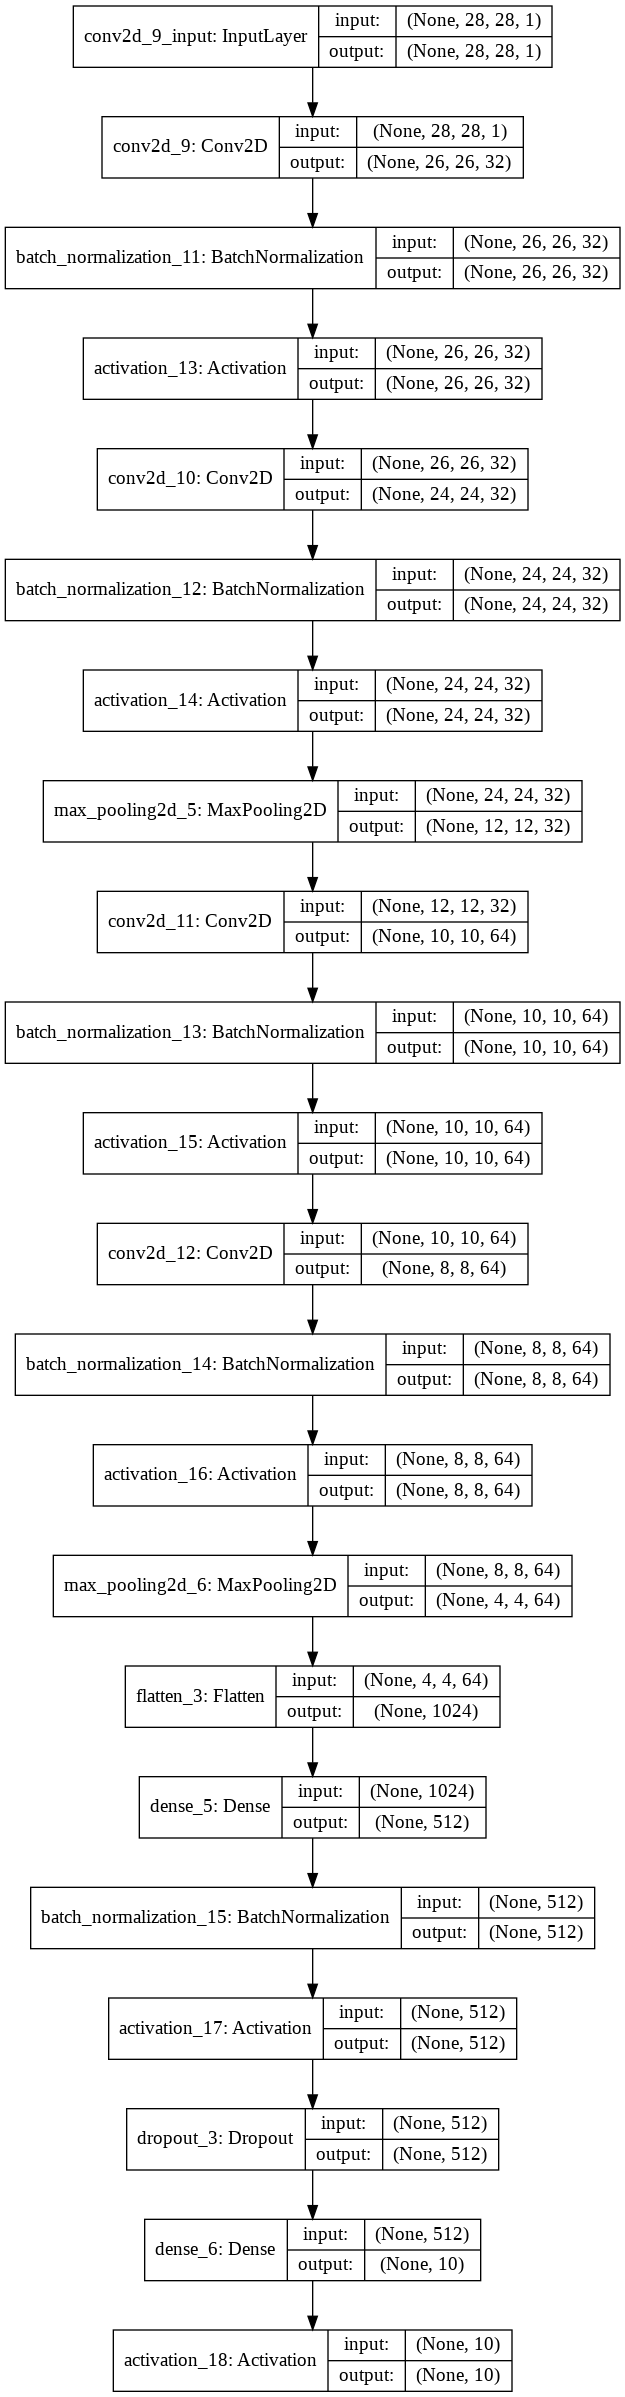

In [0]:
plot_model(model, to_file='CNN_model_plot.png', show_shapes=True, show_layer_names=True)


In [0]:
'''
Data augmentation rotates, shears, zooms, etc the image so that the model learns to generalize and 
not remember specific data. If the model overfits, 
it will perform very well on the images that it already knows but will fail if new images are given to it.
'''
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [0]:
'''
To use less memory and make model faster we are using 64 images at a time and train them 
'''
train_generator = gen.flow(X_train, y_train, batch_size=64)
test_generator = test_gen.flow(X_test, y_test, batch_size=64)

In [0]:
history = model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=20, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/20
937/937 [==============================] - 22s 23ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0083 - val_accuracy: 0.9940
Epoch 2/20
937/937 [==============================] - 22s 23ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.0198 - val_accuracy: 0.9956
Epoch 3/20
937/937 [==============================] - 22s 23ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 9.3135e-04 - val_accuracy: 0.9956
Epoch 4/20
937/937 [==============================] - 22s 23ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 4.5983e-04 - val_accuracy: 0.9914
Epoch 5/20
937/937 [==============================] - 22s 23ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 1.7656e-04 - val_accuracy: 0.9949
Epoch 6/20
937/937 [==============================] - 22s 23ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0541 - val_accuracy: 0.9953
Epoch 7/20
937/937 [==============================] - 22s 24ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 6.8018e-04

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

In [0]:
print("Accuracy on test set: ", score[1])

Accuracy on test set:  0.9961000084877014


**VGG16Net Model**